In [1]:
!python -m pip install git+https://github.com/carnotresearch/cr-vision.git


  Cloning https://github.com/carnotresearch/cr-vision.git to /tmp/pip-req-build-q6zedpn7
  Running command git clone -q https://github.com/carnotresearch/cr-vision.git /tmp/pip-req-build-q6zedpn7
     |████████████████████████████████| 2.3MB 18.7MB/s 
     |████████████████████████████████| 204kB 55.6MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 9.2MB 51.8MB/s 
     |████████████████████████████████| 563kB 55.4MB/s 
     |████████████████████████████████| 2.8MB 40.1MB/s 
     |████████████████████████████████| 102kB 15.3MB/s 
     |████████████████████████████████| 122kB 62.5MB/s 
     |████████████████████████████████| 92kB 13.8MB/s 
     |████████████████████████████████| 92kB 13.9MB/s 
  Created wheel for cr-vision: filename=cr_vision-0.1.0-cp37-none-any.whl size=80196 sha256=9f948f793e85aa23d122b3ea7e1f41dfcf1286af315d482c4842c11742e9f15c
  Stored in directory: /tmp/pip-ephem-wheel-cache-13a9zj_j/wheels/22/29/66/6318edcf35e0e833

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/work/cr-vision/experiments/cs/sda/sda.py .

In [4]:
import sda

In [6]:
!cp  /content/drive/MyDrive/datasets/birds/birds_subset_5000/test.zip .

In [ ]:
!unzip test.zip

In [8]:
from pathlib import Path
from cr.vision.io import images_from_dir

In [9]:
rootdir = Path('test')

In [10]:
images = images_from_dir(rootdir, size=12)

In [11]:
images.shape

(12, 256, 256, 3)

In [12]:
compression_ratio=16
compression_ratio

16

In [13]:
model = sda.load_saved_model('autoencoder', compression_ratio)
model.summary()

Loading the saved model from /content/drive/MyDrive/work/cr-vision/experiments/cs/sda/saved_model_autoencoder_16
Model: "FCSDA_Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 256, 256, 3)]     0         
_________________________________________________________________
FCSDA_Encoder (Functional)   (None, 16, 16, 48)        36864     
_________________________________________________________________
FCSDA_Decoder (Functional)   (None, 256, 256, 3)       38723     
Total params: 75,587
Trainable params: 75,459
Non-trainable params: 128
_________________________________________________________________


In [14]:
reconstructions = model.predict(images)


In [15]:
from skimage.metrics import peak_signal_noise_ratio


In [16]:
n = images.shape[0]

for i in range(n):
    name = 'dummy'
    src = images[i]
    dst = reconstructions[i]
    psnr = peak_signal_noise_ratio(src, dst)
    print(f"[{i+1}] PSNR : {psnr:.2f} dB, Image={name} ")


[1] PSNR : 21.75 dB, Image=dummy 
[2] PSNR : 23.41 dB, Image=dummy 
[3] PSNR : 21.05 dB, Image=dummy 
[4] PSNR : 15.67 dB, Image=dummy 
[5] PSNR : 21.46 dB, Image=dummy 
[6] PSNR : 21.29 dB, Image=dummy 
[7] PSNR : 19.13 dB, Image=dummy 
[8] PSNR : 21.89 dB, Image=dummy 
[9] PSNR : 22.96 dB, Image=dummy 
[10] PSNR : 18.59 dB, Image=dummy 
[11] PSNR : 23.81 dB, Image=dummy 
[12] PSNR : 24.04 dB, Image=dummy 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  import sys


In [17]:
n = images.shape[0]

for i in range(n):
    name = 'dummy'
    name = name[:-4]
    parts = name.split('_')
    parts = [part for part in parts if not part.isdigit()]
    name = (" ").join(parts)
    src = images[i]
    dst = reconstructions[i]
    psnr = peak_signal_noise_ratio(src, dst)
    print(f"  * - {name}")
    print(f"    - {psnr:0.2f}")

  * - d
    - 21.75
  * - d
    - 23.41
  * - d
    - 21.05
  * - d
    - 15.67
  * - d
    - 21.46
  * - d
    - 21.29
  * - d
    - 19.13
  * - d
    - 21.89
  * - d
    - 22.96
  * - d
    - 18.59
  * - d
    - 23.81
  * - d
    - 24.04


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  # This is added back by InteractiveShellApp.init_path()


In [18]:
from cr.vision.plots import plot_images_with_reconstructions


In [19]:
num_images_to_plot = 12

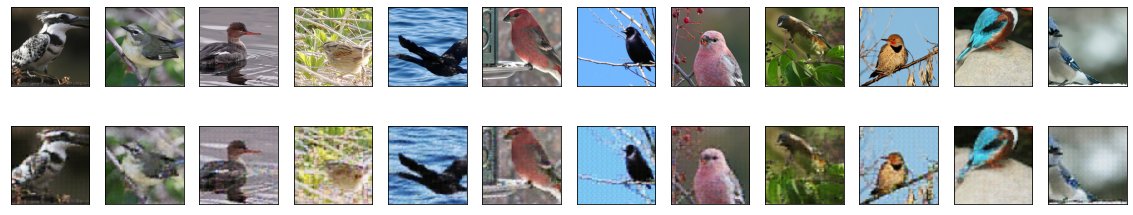

In [20]:
plot_images_with_reconstructions(images[:num_images_to_plot], reconstructions[:num_images_to_plot])
